<a href="https://colab.research.google.com/github/yousufnzm/carpool-react/blob/master/call_volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [133]:
df = pd.read_csv('/data.csv')
df.dropna()
df['Date']= pd.to_datetime(df['Date'])
df

,Date,Call Volume
0,2017-01-01,264.0
1,2017-01-02,528.0
2,2017-01-03,2505.0
3,2017-01-04,2145.0
4,2017-01-05,2164.0
...,...,...
1668,2021-07-27,1347.0
1669,2021-07-28,1374.0
1670,2021-07-29,1317.0
1671,2021-07-30,1185.0


In [31]:
df.describe()

,Call Volume
count,1672.000000
mean,1363.115431
std,732.340942
min,60.000000
25%,512.750000
50%,1480.500000
75%,1973.000000
max,5525.000000


In [134]:
df = df[:1500]
df.set_index('Date', inplace=True)

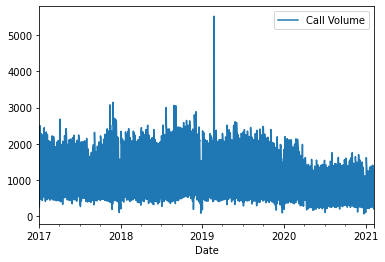

In [135]:
df.plot()

In [43]:
from statsmodels.tsa.stattools import adfuller

In [47]:
test_result = adfuller(df['Call Volume'])

In [55]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
  result = adfuller(sales)
  labels = ["ADF Test Statistics", "p-value", "#bags used", "Number of Observations Used"]
  for value, label in zip(result, labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0). Reject the hypothesis. Data has no unit and is stationary")
  else:
    print("Weak evidecnce against the null hypothesis, time series has a unit root, inditcating it is non-stationary")

In [56]:
adfuller_test(df['Call Volume'])

ADF Test Statistics : -3.0668547908026245
p-value : 0.029105319271733134
#bags used : 22
Number of Observations Used : 1477
Strong evidence against the null hypothesis(H0). Reject the hypothesis. Data has no unit and is stationary


Auto Regressive Model

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


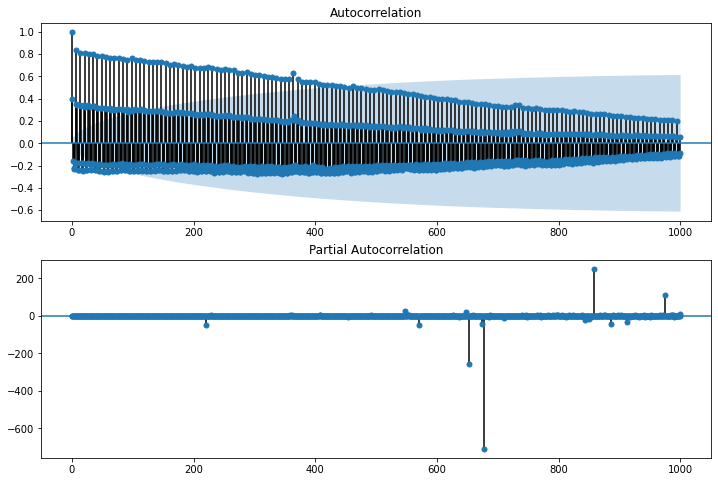

In [80]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Call Volume'], lags=1000, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Call Volume'], lags=1000, ax=ax2)

Model

In [176]:
from statsmodels.tsa.ar_model import AR

# AR(570)
model = AR(df['Call Volume'])
model_fit = model.fit(570)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


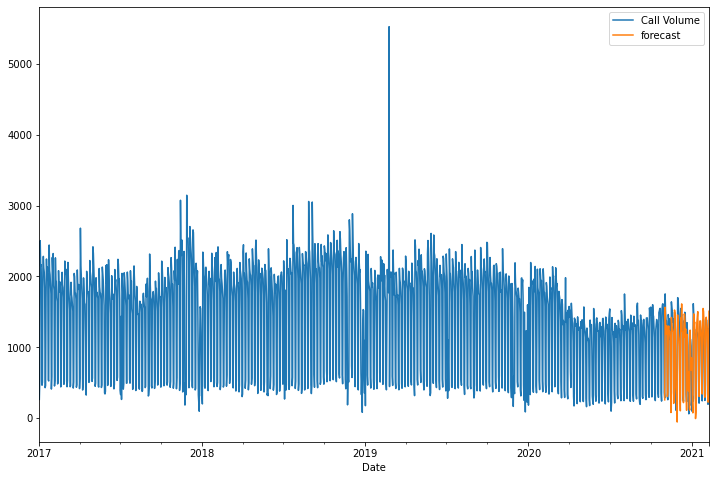

In [177]:
df['forecast']=model_fit.predict(start=1400, end=1500, dynamic=True)
df[['Call Volume', 'forecast']].plot(figsize=(12,8))

Future Predictions

In [156]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1] + DateOffset(days=x) for x in range(0,200)]

In [151]:
future_datest_df=pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [152]:
future_datest_df.tail()

,Call Volume,forecast
2021-05-14,NaN,NaN
2021-05-15,NaN,NaN
2021-05-16,NaN,NaN
2021-05-17,NaN,NaN
2021-05-18,NaN,NaN


In [153]:
future_df=pd.concat([df, future_datest_df])

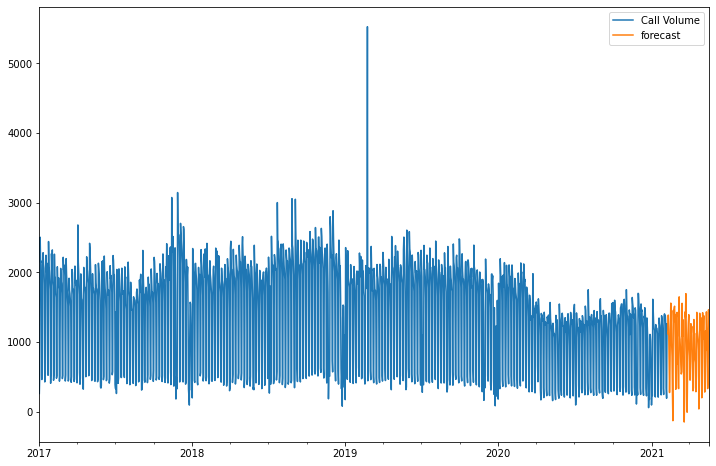

In [178]:
future_df['forecast'] = model_fit.predict(start=1500, end=1600, dynamic=True)
future_df[['Call Volume', 'forecast']].plot(figsize=(12,8))